In [2]:
import timeit # es para medir el performance de los modelo
#Queremos corroborar que los modelos con datos normalizados demoran menos que con los datos no nomralizados.

import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn import datasets, linear_model
from sklearn.preprocessing import MinMaxScaler
plt.style.use("seaborn-dark")

In [3]:
scaler = MinMaxScaler()
X, y = datasets.load_diabetes(return_X_y = True)
# X (raw) indica el indice de masa corporal
# Y es medida cuantitiva de la progresión de la enfermedad, despues de un año inicio
#raw = X[:, None, 2]
raw = X[:, None, 2] # Numpy NewAxis
raw

array([[ 0.06169621],
       [-0.05147406],
       [ 0.04445121],
       [-0.01159501],
       [-0.03638469],
       [-0.04069594],
       [-0.04716281],
       [-0.00189471],
       [ 0.06169621],
       [ 0.03906215],
       [-0.08380842],
       [ 0.01750591],
       [-0.02884001],
       [-0.00189471],
       [-0.02560657],
       [-0.01806189],
       [ 0.04229559],
       [ 0.01211685],
       [-0.0105172 ],
       [-0.01806189],
       [-0.05686312],
       [-0.02237314],
       [-0.00405033],
       [ 0.06061839],
       [ 0.03582872],
       [-0.01267283],
       [-0.07734155],
       [ 0.05954058],
       [-0.02129532],
       [-0.00620595],
       [ 0.04445121],
       [-0.06548562],
       [ 0.12528712],
       [-0.05039625],
       [-0.06332999],
       [-0.03099563],
       [ 0.02289497],
       [ 0.01103904],
       [ 0.07139652],
       [ 0.01427248],
       [-0.00836158],
       [-0.06764124],
       [-0.0105172 ],
       [-0.02345095],
       [ 0.06816308],
       [-0

<h3>Max-Min</h3>

In [25]:
# Reglas de Escalamiento
max_raw = max(raw)
min_raw = min(raw)
# los datos ya estan escalados
scaled = (2*raw -max_raw-min_raw)/(max_raw-min_raw)


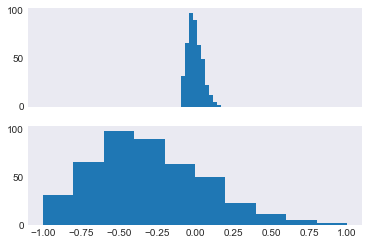

In [26]:
# Gráficos
fig, axs = plt.subplots(2, 1, sharex = True)
# Es un arreglo de graficos
# axs es el eje como quiero que se muestren nuestros graficos
# 2 = fila
# 1 = columna
# sharex : que compartan el eje X
axs[0].hist(raw) #datos en crudo
axs[1].hist(scaled) #datos normalizados
plt.show()

In [27]:
# los modelos de entrenamiento, vamos a definir unas funciones
# La variable "Y" es lo que buscamos predecir
def train_raw():
    linear_model.LinearRegression().fit(raw,y)

def train_scaled():
    linear_model.LinearRegression().fit(scaled, y) # como se muestran datos cuando se ajustan
    
# 2 funciones, train_raw con datos no escalados
# train_scaled datos escalados

In [28]:
# el tiempo que se demoran en ejecutarse
raw_time = timeit.timeit(train_raw, number=100) # Repita 100 veces
scaled_time = timeit.timeit(train_scaled, number=100)

print('train raw: {}'.format(raw_time))
print('train scaled: {}'.format(scaled_time))

train raw: 0.12154712499977904
train scaled: 0.5369550830000662


Evidenciamos una reducción en el tiempo de ejecución (que es lo que buscabamos), escalar los datos sí contribuye al algoritmo.

- max-min scalling: es mejor para datos uniformemente distribuidos
- z-score scalling: es mejor para datos con una distribución normal ( forma de campa de gauss)

<h3> Z-score</h3>

In [29]:
# promedio = np.mean(raw)
promedio = raw.mean()
# desviacion estandar 
desviacion_estandar = raw.std()
scaled_z = (raw - promedio) / desviacion_estandar

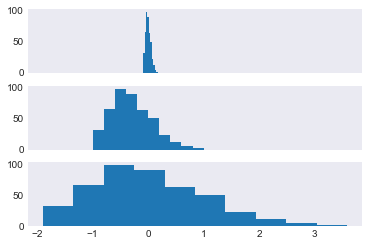

In [30]:
fig, axs = plt.subplots(3,1, sharex= True)
axs[0].hist(raw) # datos sin escalamiento
axs[1].hist(scaled) # max-min
axs[2].hist(scaled_z) # Z-score
plt.show()

In [31]:
# Modelo de entrenamiento
def train_scaled_z():
    linear_model.LinearRegression().fit(scaled_z,y)

In [36]:
# Performance
scaled_z_time = timeit.timeit(train_scaled_z, number=100)
print('Trained Raw : {}'.format(raw_time))
print('Trained Scaled: {}'.format(scaled_time))
print('Trained Scaled_Z: {}'.format(scaled_z_time))

Trained Raw : 0.12154712499977904
Trained Scaled: 0.5369550830000662
Trained Scaled_Z: 0.06440720800037525


# Transformaciones, para distribuciones no lineales

Cuando tenemos un data set cuya distribucion esta fuertemente sesgada, como el data set cars (autos usados) podemos aplicar lo siguiente:


In [38]:
df = pd.read_csv('cars.csv')

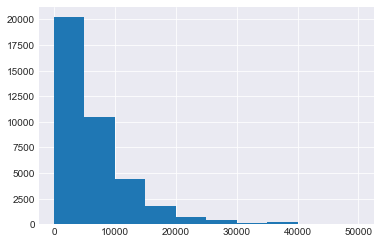

In [39]:
df.price_usd.hist()
plt.show()

Transformación con la tangente hiperbolica tanh(x)

<AxesSubplot:>

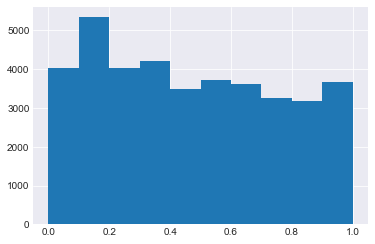

In [43]:
p=10000 #valor que se asigna para buscar una mejor distribución.
df.price_usd.apply(lambda x: np.tanh(x/p)).hist()

Con ese nuevo gráfico se evidencia que se transforma la data a una distribución uniforme. Con ella podemos realizar un escalamiento de los datos (idealmente max-min).